In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
amazon=pd.read_csv('amazon_close.csv', index_col='date', parse_dates=True)
amazon=amazon.sort_index()

In [36]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(amazon,order=(2,0,1))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5547.218
Date:                Wed, 16 Aug 2023   AIC                          11102.435
Time:                        06:15:22   BIC                          11122.988
Sample:                             0   HQIC                         11110.159
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        849.7302   2308.786      0.368      0.713   -3675.407    5374.868
ar.L1          0.9997      0.001    806.439      0.000       0.997       1.002
ma.L1         -0.0285      0.012     -2.303      0.021      -0.053      -0.004
sigma2       390.8422      6.307     61.973      0.000     378.481     403.203
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7078.54
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              15.82   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
### 외생 변수 추가 가능

### model=ARIMA(df['productivity'], order=(2,0,1), exog=df['hours_sleep'])

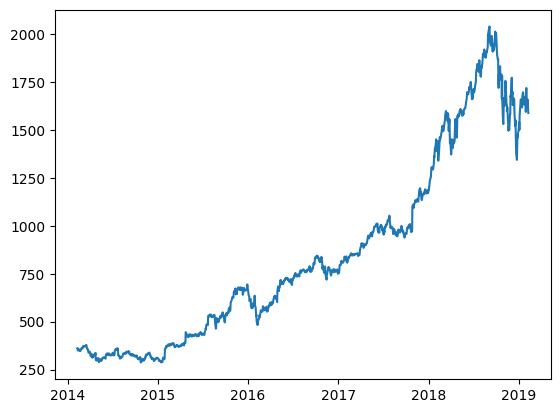

In [35]:
plt.plot(amazon.index, amazon, label='observed')
plt.show()

In [65]:
results=model.fit()
forecast=results.get_prediction(start=-25)
# 훈련 데이터의 마지막 25개 항목에 대해 예측 수행
mean_forecast=forecast.predicted_mean

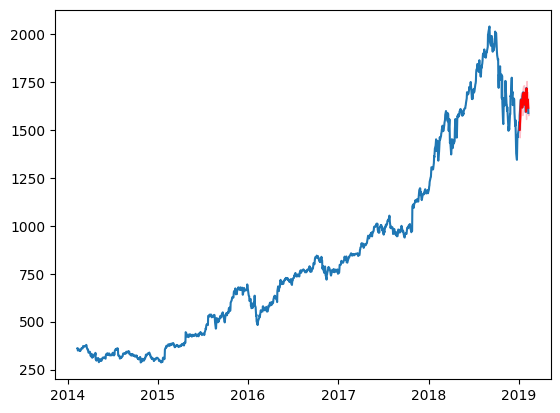

In [66]:
confidence_intervals=forecast.conf_int()
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']
plt.plot(amazon.index, amazon, label='observed')
plt.plot(mean_forecast.index ,mean_forecast.values,color='red',label='forecast')
plt.fill_between(lower_limits.index,lower_limits, upper_limits,color='pink')
plt.show()

In [68]:
results=model.fit()
forecast=results.get_prediction(start=-25, dynamic=True)
mean_forecast=forecast.predicted_mean

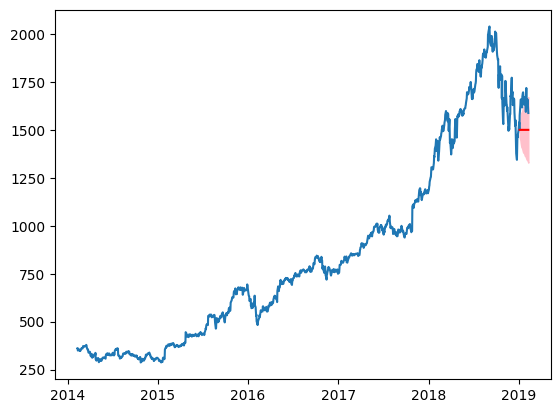

In [69]:
confidence_intervals=forecast.conf_int()
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']
plt.plot(amazon.index, amazon, label='observed')
plt.plot(mean_forecast.index ,mean_forecast.values,color='red',label='forecast')
plt.fill_between(mean_forecast.index,lower_limits, upper_limits,color='pink')
plt.show()

In [85]:
forecast=results.get_forecast(steps=20)
mean_forecast=forecast.predicted_mean
confidence_intervals=forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


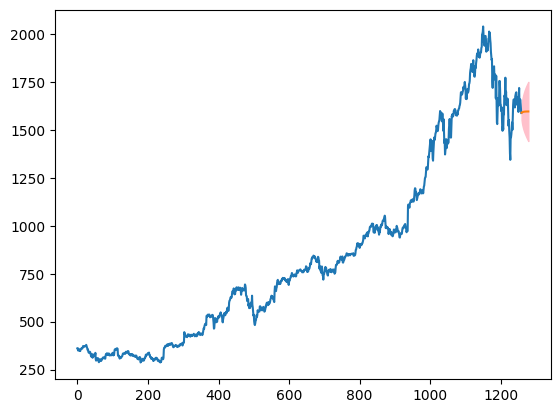

In [95]:
amazon1=amazon.reset_index(drop=True)
ax=amazon1['close'].plot(label='observed')
forecast=results.get_forecast(steps=20)
mean_forecast=forecast.predicted_mean
confidence_intervals=forecast.conf_int()
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']
mean_forecast.plot(ax=ax,label='Forcast')
plt.fill_between(mean_forecast.index,lower_limits, upper_limits,color='pink')
plt.show()

In [51]:
# Introduction ARIMA model
diff_forecast=results.get_forecast(step=10).predicted_mean
from numpy import cumsum
mean_forecast=cumsum(diff_forecast)+amazon.iloc[-1,0]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['step']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [96]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(amazon, order=(2,1,1))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [97]:
results=model.fit()
mean_forecast=results.get_forecast(steps=10).predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [98]:
mean_forecast

1259    1589.782930
1260    1591.046997
1261    1592.065782
1262    1592.886879
1263    1593.548647
1264    1594.082004
1265    1594.511867
1266    1594.858318
1267    1595.137543
1268    1595.362586
Name: predicted_mean, dtype: float64

In [100]:
from statsmodels.tsa.stattools import adfuller
adf=adfuller(amazon.iloc[:,0])
print('ADF Statistic:',adf[0])
print('p-value:',adf[1])

ADF Statistic: -0.10724784613126699
p-value: 0.948711817726528


In [101]:
adf=adfuller(amazon.diff().dropna().iloc[:,0])
print('ADF Statistic:',adf[0])
print('p-value:',adf[1])

ADF Statistic: -7.201108938057436
p-value: 2.364215013896075e-10
